# Imports

In [5]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv('./Data/full_sample_clean.csv', sep=',', index_col=0)

# Recruitment

In [7]:
print(f'{len(df.subject.unique())} participants completed the task')
print(f'Before exclusions, {len(df.loc[df.group == "neurotypical"].subject.unique())} are in the neurotypical group.')
print(f'After exclusions {len(df.loc[(df.in_sample == True)&(df.group=="neurotypical")].subject.unique())} subjects ({(len(df.loc[(df.in_sample == True)&(df.group=="neurotypical")].subject.unique())/len(df.loc[df.group=="neurotypical"].subject.unique())) * 100 :.3} %)remain in the neurotypical sample')
print(f'Before exclusions, {len(df.loc[df.group == "autism"].subject.unique())} are in the autism, group.')
print(f'After exclusions,  {len(df.loc[(df.in_sample == True)&(df.group=="autism")].subject.unique())} subjects ({(len(df.loc[(df.in_sample == True)&(df.group=="autism")].subject.unique())/len(df.loc[df.group=="autism"].subject.unique())) * 100 :.3} %)remain in the autism sample')

1058 participants completed the task
Before exclusions, 501 are in the neurotypical group.
After exclusions 389 subjects (77.6 %)remain in the neurotypical sample
Before exclusions, 557 are in the autism, group.
After exclusions,  222 subjects (39.9 %)remain in the autism sample


# Demographics

## Age x Group

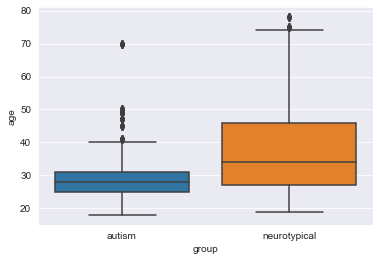

In [8]:
g = sns.boxplot(data=df.loc[df.in_sample==True], y="age", x='group');

## Age x Gender

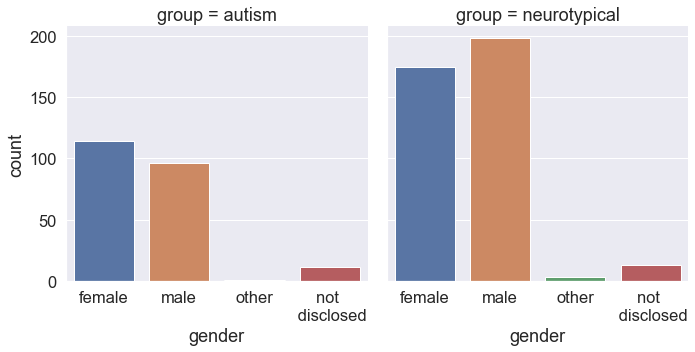

In [9]:
xx = df.loc[df.in_sample == True,].groupby(['subject','gender','group']).size()
xx = xx.reset_index()
sns.set(font_scale=1.5)
g = sns.catplot(data=xx, x='gender', col='group', kind='count');
#g.fig.set_size_inches((8, 5))
g.axes[0][0].set_xticklabels(['female', 'male', 'other', 'not \n disclosed']);
#plt.legend(bbox_to_anchor=(.02, 1), loc='upper left', borderaxespad=0);
#plt.savefig('./Figures/genderxgroup.png', dpi=300)

## Age x RT x Group

<ipython-input-10-26177eeeec9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_a = df.loc[df.in_sample == True].groupby(['subject', 'group']).mean()


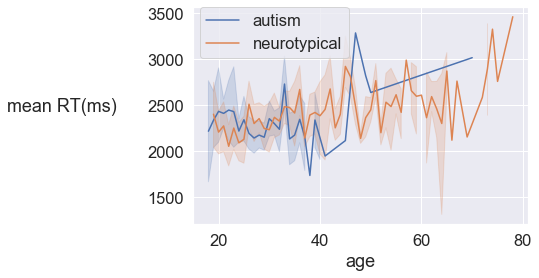

In [10]:
df_a = df.loc[df.in_sample == True].groupby(['subject', 'group']).mean()
dd_a = df_a.reset_index().sort_values('subject')
sns.lineplot(x='age', y='rt', hue='group', data=df_a);
plt.legend(bbox_to_anchor=(.02, 1), loc='upper left', borderaxespad=0);
plt.ylabel('mean RT(ms)', labelpad=85, rotation=0);

# Accuracy

## Group x Ascription

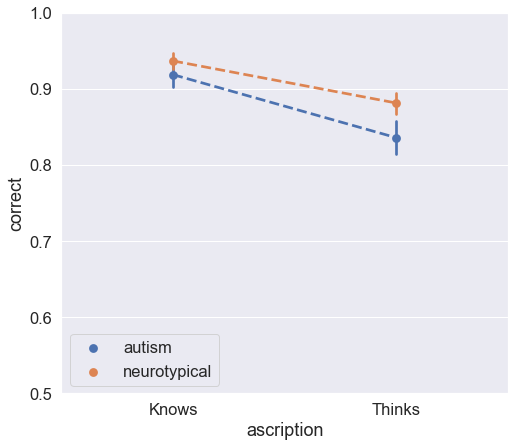

In [11]:
acc= df.loc[df.in_sample==True].groupby(['subject', 'group', 'ascription', 'agent_state']).correct.mean()
acc = acc.reset_index()
fig, ax = plt.subplots(figsize=(8,7))
sns.pointplot(hue='group', y='correct', x='ascription', data=acc, linestyles='--');
plt.ylim([.5, 1]);
plt.legend(bbox_to_anchor=(.02, .02), loc='lower left', borderaxespad=0);

#plt.savefig('./Figures/acc_groupxascipt.png', dpi=300)

## Group x Agent State x Ascription

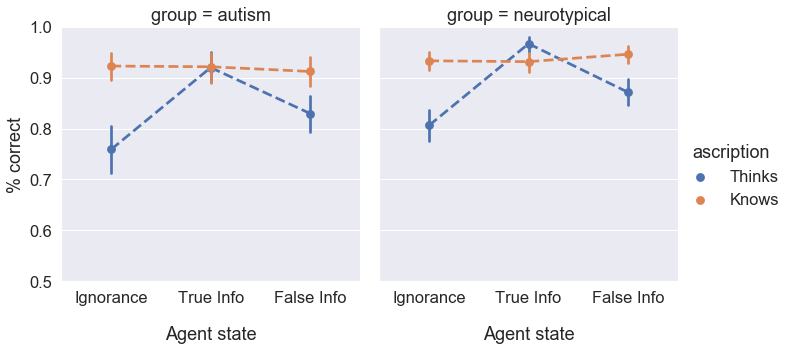

In [12]:
sns.set(font_scale=1.5)
g = sns.catplot(hue='ascription', x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='correct', hue_order=['Thinks', 'Knows'], data=acc, col='group', kind='point', linestyles='--');
g.set(ylim=(.5, 1));

for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("% correct");
    g.axes[0][aa].xaxis.set_label_text("Agent state");
    g.axes[0][aa].xaxis.labelpad = 20;

#plt.savefig('./Figures/groupxagentxascrip.png')

### Does this effect appear in prior studies?

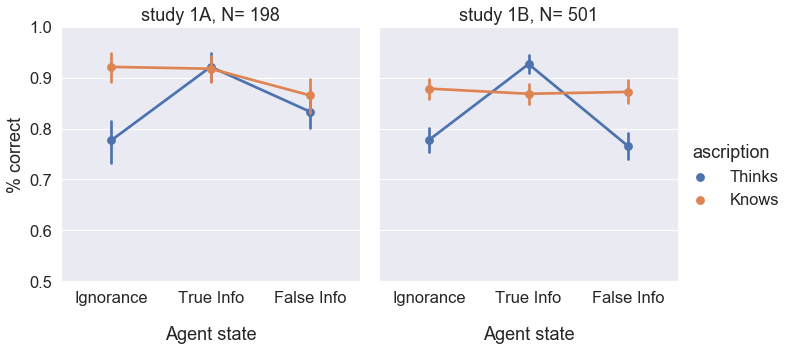

In [13]:
e1adat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1a.csv', header=0)
e1adat['group'] = 'study 1A'
e1bdat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1b.csv', header=0)
e1bdat['group'] = 'study 1B'
e1dat = pd.concat([e1adat, e1bdat], ignore_index=True)
e1dat = e1dat.loc[e1dat.condition != 'D']
e1dat.sort_values('subj')
#sdat = e1dat.loc[e1dat.subj == e1dat.subj.unique()[10]]
e1dat['ascription'] = ['Thinks' if int(x) == 0 else 'Knows'  for x in e1dat.question]
for v, cond in zip(sorted(e1dat.condition.unique()),['True Info', 'False Info', 'Ignorance', 'True Info', 'False Info', 'Ignorance']):
    e1dat.loc[e1dat.condition == v, 'agent_state'] = cond

for v, cond in zip(sorted(e1dat.response.unique()), [False, True]):
    e1dat.loc[e1dat.response == v, 'resp'] = cond

e1dat['correct_answer'] = False
e1dat.loc[e1dat.agent_state == 'True Info', 'correct_answer'] = True
e1dat['correct'] = e1dat.apply(lambda row: row['resp'] == row['correct_answer'], axis=1)
sns.set(font_scale=1.5)
g = sns.catplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='correct', hue='ascription', hue_order=['Thinks', 'Knows'], col='group', kind='point', data=e1dat, aspect=1);
g.set(ylim=(.5, 1));
for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("% correct");
    g.axes[0][aa].xaxis.set_label_text("Agent state");
    g.axes[0][aa].xaxis.labelpad = 20;

g.axes[0][0].title.set_text(f'study 1A, N= {len(e1dat.loc[e1dat.group=="study 1A"].subj.unique())}');
g.axes[0][1].title.set_text(f'study 1B, N= {len(e1dat.loc[e1dat.group=="study 1B"].subj.unique())}');

## Accuracy x Item

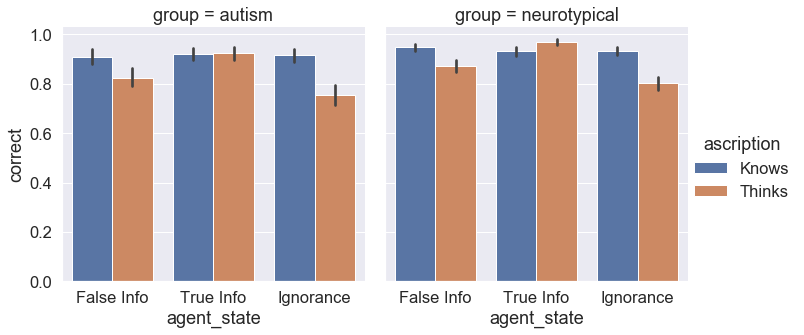

In [14]:
sns.catplot(x='agent_state', y='correct', col='group', hue='ascription', kind='bar', data=df.loc[df.in_sample == True]);

# Autism Quotient

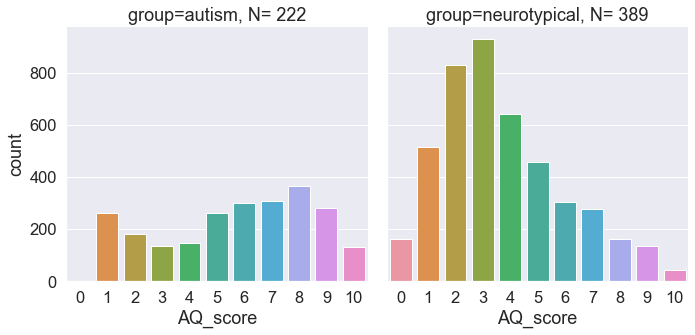

In [15]:
g = sns.catplot(data=df.loc[df.in_sample==True], x='AQ_score', col='group', kind='count');

g.axes[0][0].title.set_text(f'group=autism, N= {len(df.loc[(df.in_sample == True)&(df.group == "autism")].subject.unique())}');
g.axes[0][1].title.set_text(f'group=neurotypical, N= {len(df.loc[(df.in_sample == True)&(df.group == "neurotypical")].subject.unique())}');
#plt.savefig('./Figures/group_aq10.png', dpi=300)

In [16]:

aq = {'rt_thinks':[], 'rt_knows':[], 'pid':[],'rt_diff':[], 'group':[], 'aq_score': [], 'age':[] }
for subj in tqdm(df.loc[df.in_sample==True].subject.unique()):
    sdat = df.loc[(df.subject == subj) & (df.correct==True) & (df.in_sample==True)]
    tt = sdat.loc[sdat.ascription == 'Thinks'].rt.mean()
    kk = sdat.loc[sdat.ascription == 'Knows'].rt.mean()
    for var, val in zip(sorted(list(aq.keys())), [sdat.age.values[0],sdat.AQ_score.values[0], sdat.group.values[0],subj, tt-kk, kk, tt ]):
        aq[var].append(val)

aqdf = pd.DataFrame(aq)

100%|██████████| 611/611 [00:01<00:00, 391.51it/s]


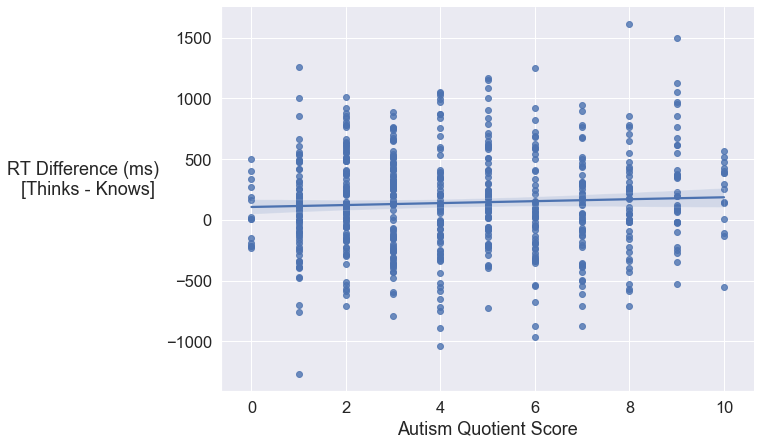

In [17]:
g = sns.lmplot(x='aq_score', y='rt_diff', y_partial='age',  data=aqdf, markers=None);
g.set_axis_labels(y_var='RT Difference (ms) \n [Thinks - Knows]', rotation=0, labelpad=80)
g.fig.set_size_inches((11, 7))
g.set_axis_labels(x_var='Autism Quotient Score')
#plt.savefig('./Figures/rt_diffxAQxgroup.png', dpi=300)

# Felicity Judgements

In [18]:
def jitter(values,j):
    return values + np.random.normal(j,0.15,values.shape)

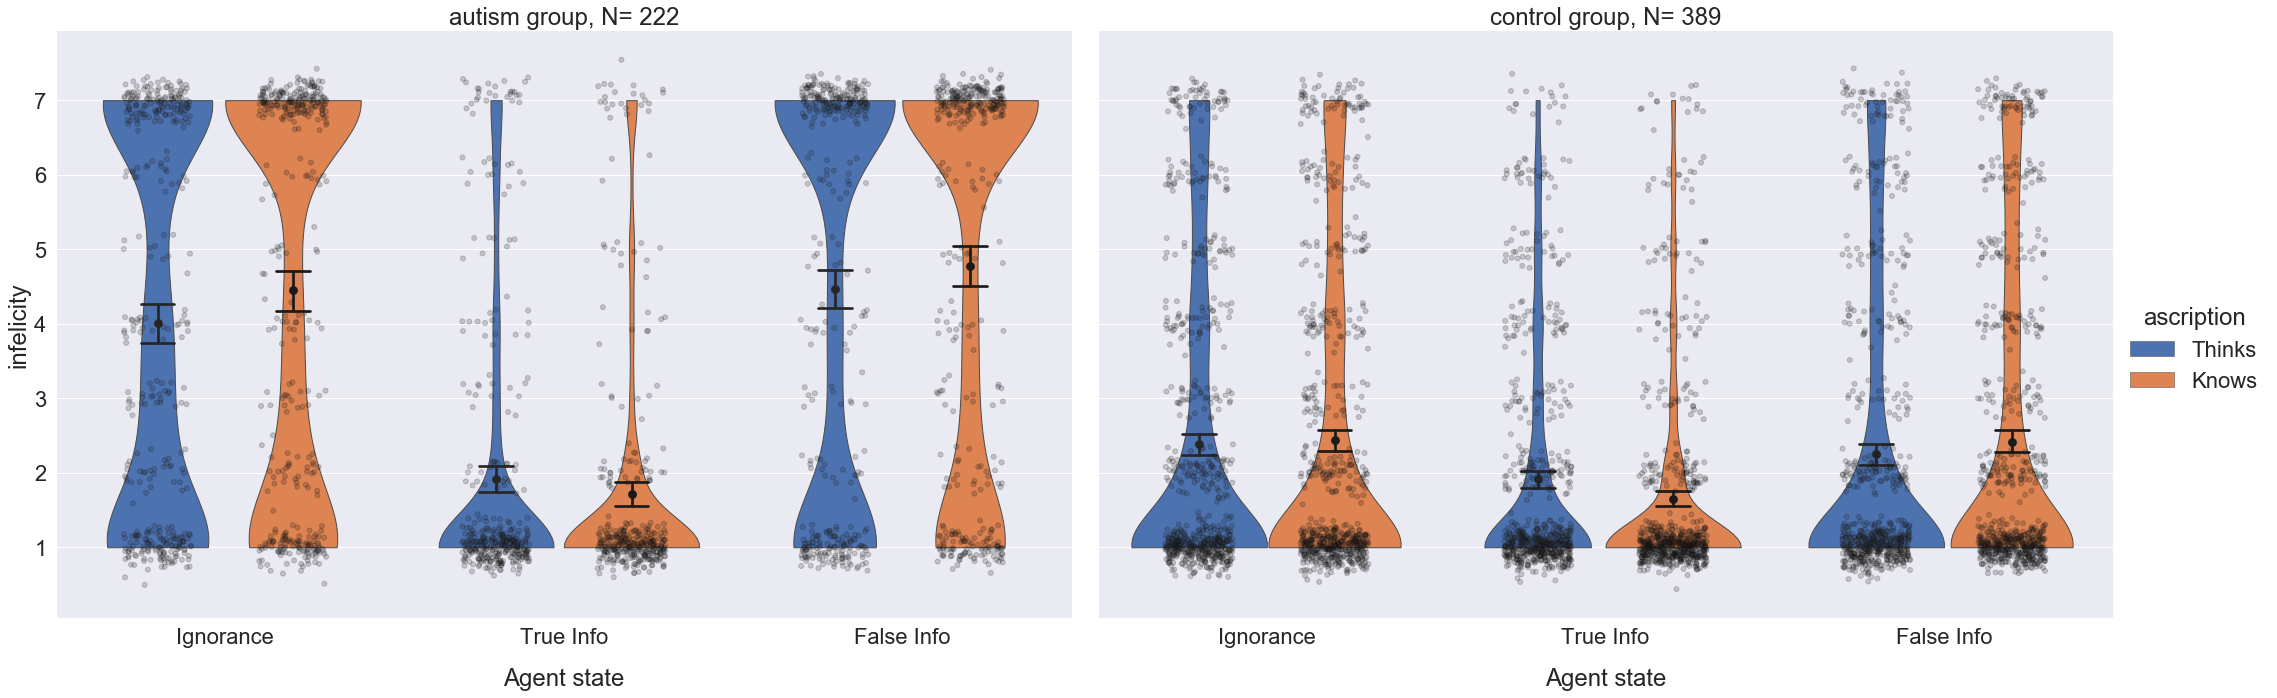

In [19]:
sns.set(font_scale=2)

f1 = df.loc[(df.group== 'autism') & (df.in_sample==True)]
f2 = df.loc[(df.group== 'neurotypical') & (df.in_sample==True)]

gg = sns.catplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], kind='violin', col='group', cut=0, data=df.loc[df.in_sample == True], inner=None, bw=.25, linewidth=1, saturation=1, height=10, aspect=1.5);

sns.stripplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f1, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=gg.axes[0][0]);

sns.stripplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f2, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=gg.axes[0][1]);

sns.pointplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f1, join=False, dodge=.4, capsize=.1, ax=gg.axes[0][0], color='k',);

sns.pointplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f2, join=False, dodge=.4, capsize=.1, ax=gg.axes[0][1], color='k',);


#ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
for aa in [0, 1]:
    gg.axes[0][aa].yaxis.set_label_text("infelicity")
    gg.axes[0][aa].xaxis.set_label_text("Agent state")
    gg.axes[0][aa].xaxis.labelpad = 20
    gg.axes[0][aa].legend_.remove()

gg.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.group=="autism") &(df.in_sample==True)].subject.unique())}')
gg.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.group=="neurotypical") &(df.in_sample==True)].subject.unique())}')

#plt.savefig('./Figures/group_fel.png', dpi=500)

# Response Time

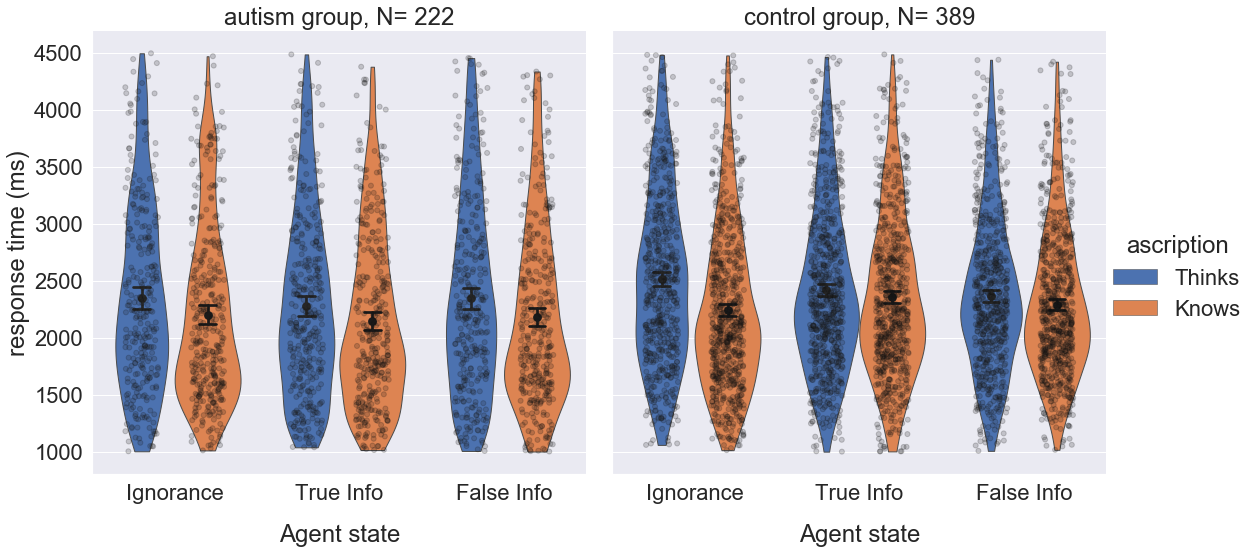

In [20]:

sns.set(font_scale=2)
g = sns.catplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][0], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription',  hue_order=['Thinks', 'Knows'],color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][1], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][0], color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][1], color='k', data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);


for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("response time (ms)")
    g.axes[0][aa].xaxis.set_label_text("Agent state")
    g.axes[0][aa].xaxis.labelpad = 20
    g.axes[0][aa].legend_.remove()

g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')

#plt.savefig('./Figures/groupxascrip_rt.png', dpi=400)

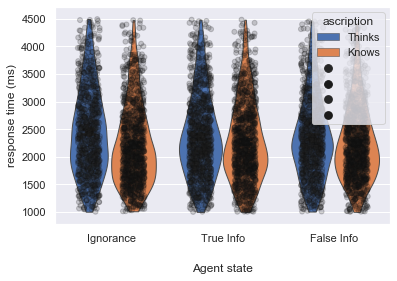

In [66]:
sns.set(font_scale=1)
g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
#plt.legend(title="Ascription", loc="outer right", labels=['Thinks', 'Knows'])
for t, l in zip(g.legend_.texts, ['Thinks', 'Knows', '', '', '', '']):
    t.set_text(l)
#g.legend_.texts = g.legend_.legendHandles[:2]
    #g.axes.legend_.remove()
#g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
#g.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')


In [58]:
x = g.legend_
x.set()

[]